# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [14]:
dataset =s[:,2:-1] pd.read_csv('Churn_Modelling.csv')
x = dataset.value
y = dataset.values[:,-1]

### Encoding categorical data

Label Encoding the "Gender" column

In [17]:
from sklearn.preprocessing import LabelEncoder

In [26]:
Encoder1 = LabelEncoder()
Encoder1.fit(np.unique(x[:,3]))
x[:,3] = Encoder1.transform(x[:,3])

One Hot Encoding the "Geography" column

In [43]:
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer

In [71]:
lbz = LabelBinarizer()
lali = x[:,3:]
p = np.concatenate((x[:,:3],lbz.fit_transform(x[:,2])),axis=1)
xed = np.append(p,lali,axis=1)

In [82]:
x = np.delete(xed,2,1)
x = np.delete(x,0,1)

### Splitting the dataset into the Training set and Test set

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Feature Scaling

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

## Part 2 - Building the ANN

### Initializing the ANN

In [98]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [99]:
ann.add(layer=tf.keras.layers.ELU())
ann.add(layer=tf.keras.layers.Dense(units=8, activation='relu'))

### Adding the second hidden layer

In [100]:
ann.add(layer=tf.keras.layers.Dense(units=8, activation='relu'))

### Adding the output layer

In [102]:
ann.add(layer=tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [103]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Training the ANN on the Training set

In [108]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [109]:
ann.fit(x_train, y_train, batch_size= 32, epochs= 500)

Epoch 1/500
250/250 [==============================] - 0s 958us/step - loss: 0.6692 - accuracy: 0.6808
Epoch 2/500
250/250 [==============================] - 0s 987us/step - loss: 0.6105 - accuracy: 0.7945
Epoch 3/500
250/250 [==============================] - 0s 911us/step - loss: 0.5737 - accuracy: 0.7945
Epoch 4/500
250/250 [==============================] - 0s 938us/step - loss: 0.5489 - accuracy: 0.7945
Epoch 5/500
250/250 [==============================] - 0s 915us/step - loss: 0.5321 - accuracy: 0.7945
Epoch 6/500
250/250 [==============================] - 0s 938us/step - loss: 0.5185 - accuracy: 0.7945
Epoch 7/500
250/250 [==============================] - 0s 906us/step - loss: 0.5043 - accuracy: 0.7945
Epoch 8/500
250/250 [==============================] - 0s 1ms/step - loss: 0.4856 - accuracy: 0.7945
Epoch 9/500
250/250 [==============================] - 0s 918us/step - loss: 0.4708 - accuracy: 0.7945
Epoch 10/500
250/250 [==============================] - 0s 937us/step - los

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

In [135]:
news = scaler.transform(np.array([[600, 1,0,0,1,
                                  40,3,60000,2,1,1,50000]])).astype(np.float32)


**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

In [136]:
ann.predict(news)

array([[0.03739769]], dtype=float32)

**Solution**

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

### Making the Confusion Matrix

In [139]:
y_pred = (ann.predict(scaler.transform(x_test)) > 0.5).astype(np.float32).reshape(1,-1)

In [152]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [151]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


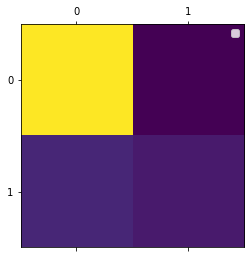

In [162]:
plt.matshow(confusion_matrix(y_pred = y_pred, y_true=y_test.astype(np.float32)))
plt.legend()
plt.show()

In [157]:
y_pred = y_pred.reshape(y_test.shape)

In [163]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


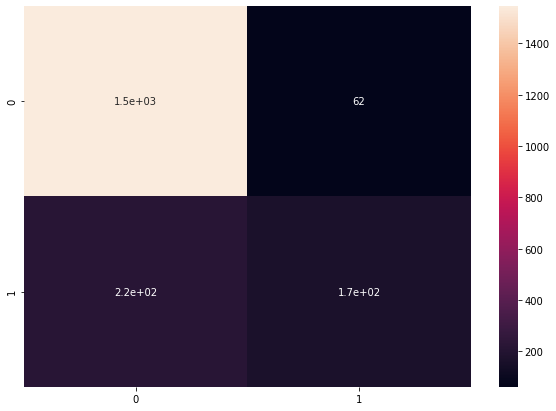

In [166]:
df_cm = pd.DataFrame(confusion_matrix(y_pred = y_pred, y_true=y_test.astype(np.float32)), 
                     index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)